In [11]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import figure


In [12]:
# Import CSV file

df = pd.read_csv('HomeTest 1 - KPMG Data.xlsx - Transactions.csv')
df = df[df['order_status'] == 'Approved']
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,25/02/2017,False,Approved,Solex,Standard,medium,medium,"71,49","$53,62",41245.0
1,2,3,3120,21/05/2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","$388,92",41701.0
2,3,37,402,16/10/2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","$248,82",36361.0
3,4,88,3135,31/08/2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","$381,10",36145.0
4,5,78,787,01/10/2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","$709,48",42226.0


## Explore Data Analysis

In [13]:
x = df.shape
print(f'The DataFrame has {x[0]} rows and {x[1]} columns')

The DataFrame has 19821 rows and 13 columns


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19821 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           19821 non-null  int64  
 1   product_id               19821 non-null  int64  
 2   customer_id              19821 non-null  int64  
 3   transaction_date         19821 non-null  object 
 4   online_order             19467 non-null  object 
 5   order_status             19821 non-null  object 
 6   brand                    19625 non-null  object 
 7   product_line             19625 non-null  object 
 8   product_class            19625 non-null  object 
 9   product_size             19625 non-null  object 
 10  list_price               19821 non-null  object 
 11  standard_cost            19625 non-null  object 
 12  product_first_sold_date  19625 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 2.1+ MB


#### Base on the .info(), we see that customer_id and transaction_date don't contain null value, and our Cohort Analyst bases on Time so we don't need to handle missing value in other columns, we will continue our analyst.

In [15]:
df1 = df[['customer_id', 'transaction_date']].copy()
df1

,customer_id,transaction_date
0,2950,25/02/2017
1,3120,21/05/2017
2,402,16/10/2017
3,3135,31/08/2017
4,787,01/10/2017
...,...,...
19995,1018,24/06/2017
19996,127,09/11/2017
19997,2284,14/04/2017
19998,2764,03/07/2017


In [18]:
# Convert transaction_date from object to datetime
df1['transaction_date'] = pd.to_datetime(df1['transaction_date'])
df1.head()

,customer_id,transaction_date
0,2950,2017-02-25
1,3120,2017-05-21
2,402,2017-10-16
3,3135,2017-08-31
4,787,2017-10-01


In [20]:
# Create date code by month
df1['YM'] = df1.apply(lambda x: int(datetime.strftime(x.transaction_date, '%Y%m')), axis=1)
df1.head()

,customer_id,transaction_date,YM
0,2950,2017-02-25,201702
1,3120,2017-05-21,201705
2,402,2017-10-16,201710
3,3135,2017-08-31,201708
4,787,2017-10-01,201710


In [21]:
start_month = min(df1['YM'])
start_month

201701

In [22]:
# Create transaction month index
df1['transaction_month_index'] = df1['YM'].apply(lambda x: x - start_month+1)
df1.head()

,customer_id,transaction_date,YM,transaction_month_index
0,2950,2017-02-25,201702,2
1,3120,2017-05-21,201705,5
2,402,2017-10-16,201710,10
3,3135,2017-08-31,201708,8
4,787,2017-10-01,201710,10


In [23]:
# In this step, we find new customer in that month, min() is the month customer first purchase
df2 = df1.groupby('customer_id')['transaction_month_index'].min().reset_index()
df2.head()

,customer_id,transaction_month_index
0,1,1
1,2,5
2,3,2
3,4,4
4,5,3


##### Transaction_month_index: con số thể hiện giao dịch date đó, của customer_id đó thuộc tháng nào trong năm. Và vì ta đã groupby lại, và dùng .min() nên nó sẽ thể hiện đây là tháng mà 1 khách hàng giao dịch lần đầu tiên.

##### Transaction_month_index = cohort_month: đơn giản là 1 con số thể hiện tháng mà 1 khách hàng giao dịch lần đầu tiên.

In [24]:
# Rename column to cohort
df3 = df2.rename(columns={'transaction_month_index':'cohort_month'})
df3.head()

,customer_id,cohort_month
0,1,1
1,2,5
2,3,2
3,4,4
4,5,3


In [25]:
df4 = df1.join(df3.set_index('customer_id'), on='customer_id')
df4

,customer_id,transaction_date,YM,transaction_month_index,cohort_month
0,2950,2017-02-25,201702,2,2
1,3120,2017-05-21,201705,5,1
2,402,2017-10-16,201710,10,1
3,3135,2017-08-31,201708,8,2
4,787,2017-10-01,201710,10,1
...,...,...,...,...,...
19995,1018,2017-06-24,201706,6,1
19996,127,2017-11-09,201711,11,1
19997,2284,2017-04-14,201704,4,4
19998,2764,2017-07-03,201707,7,2


##### Sau khi join 2 bảng lại, ta sẽ có cohort_month trở thành tháng đầu tiên một khách hàng giao dịch, còn transaction_month_index sẽ thể hiện tháng của giao dịch 

In [26]:
df4['cohort_index'] = df4['transaction_month_index'] - df4['cohort_month']
df4.head()

,customer_id,transaction_date,YM,transaction_month_index,cohort_month,cohort_index
0,2950,2017-02-25,201702,2,2,0
1,3120,2017-05-21,201705,5,1,4
2,402,2017-10-16,201710,10,1,9
3,3135,2017-08-31,201708,8,2,6
4,787,2017-10-01,201710,10,1,9


##### Cohort_index: bằng transaction_month_index - cohort_month, index này thể hiện số tháng mà customer đó vẫn còn giao dịch ở đây (aka tháng thứ mấy)

In [27]:
df5 = df4[['customer_id','cohort_month','cohort_index']]
df5

,customer_id,cohort_month,cohort_index
0,2950,2,0
1,3120,1,4
2,402,1,9
3,3135,2,6
4,787,1,9
...,...,...,...
19995,1018,1,5
19996,127,1,10
19997,2284,4,0
19998,2764,2,5


In [28]:
df6 = df5.drop_duplicates(subset=['customer_id','cohort_month','cohort_index'], keep='first')
df6

,customer_id,cohort_month,cohort_index
0,2950,2,0
1,3120,1,4
2,402,1,9
3,3135,2,6
4,787,1,9
...,...,...,...
19988,714,1,3
19991,1374,1,8
19992,5,3,1
19994,718,1,4


##### Drop_duplicate() ở bước này để lọc bỏ các giao dịch của cùng 1 khách hàng trong cùng 1 tháng, vì ta đang phân tích cohort base on Time, nên chỉ cần biết tháng đó khách có phát sinh giao dịch ko, ko cần biết có bao nhiêu giao dịch tháng đó.

In [29]:
# Bước này additional để biết có duplicate ko.
duplicate_customer_id = df6['customer_id'].duplicated()
print(duplicate_customer_id)

0        False
1        False
2        False
3        False
4        False
         ...  
19988     True
19991     True
19992     True
19994     True
19995     True
Name: customer_id, Length: 15774, dtype: bool


In [51]:
df7 = df6.groupby(['cohort_month','cohort_index'])['customer_id'].count().reset_index()
df7 = df7.rename(columns={'customer_id':'customer_count'})
df7

,cohort_month,cohort_index,customer_count
0,1,0,1347
1,1,1,483
2,1,2,505
3,1,3,499
4,1,4,492
...,...,...,...
73,10,1,6
74,10,2,8
75,11,0,13
76,11,1,5


In [52]:
df7['cohort_month'] = '2017-' + df7['cohort_month'].astype(str).str.zfill(2)
df7

,cohort_month,cohort_index,customer_count
0,2017-01,0,1347
1,2017-01,1,483
2,2017-01,2,505
3,2017-01,3,499
4,2017-01,4,492
...,...,...,...
73,2017-10,1,6
74,2017-10,2,8
75,2017-11,0,13
76,2017-11,1,5


##### Ở bước này, việc groupby (cohort_month và cohort_index) và count customer_id, ta sẽ ra được tháng đó có tổng cộng bao nhiêu khách hàng giao dịch, bao nhiêu là khách hàng cũ và bao nhiêu khách hàng mới.

In [53]:
df8 = df7.pivot_table(index = 'cohort_month', columns = 'cohort_index', values = 'customer_count')
df8

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01,1347.0,483.0,505.0,499.0,492.0,475.0,513.0,524.0,489.0,524.0,492.0,510.0
2017-02,800.0,322.0,297.0,311.0,283.0,297.0,306.0,281.0,325.0,306.0,292.0,NaN
2017-03,484.0,167.0,172.0,164.0,180.0,184.0,173.0,209.0,186.0,180.0,NaN,NaN
2017-04,337.0,110.0,121.0,152.0,142.0,118.0,144.0,125.0,129.0,NaN,NaN,NaN
2017-05,213.0,86.0,83.0,88.0,73.0,73.0,74.0,83.0,NaN,NaN,NaN,NaN
2017-06,123.0,45.0,44.0,47.0,45.0,45.0,54.0,NaN,NaN,NaN,NaN,NaN
2017-07,77.0,26.0,26.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,51.0,18.0,22.0,18.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,24.0,8.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# Calculate percentage
df9 = df8.divide(df8.iloc[:,0], axis=0).round(3)*100
df9

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2017-01,100.0,35.9,37.5,37.0,36.5,35.3,38.1,38.9,36.3,38.9,36.5,37.9
2017-02,100.0,40.2,37.1,38.9,35.4,37.1,38.2,35.1,40.6,38.2,36.5,NaN
2017-03,100.0,34.5,35.5,33.9,37.2,38.0,35.7,43.2,38.4,37.2,NaN,NaN
2017-04,100.0,32.6,35.9,45.1,42.1,35.0,42.7,37.1,38.3,NaN,NaN,NaN
2017-05,100.0,40.4,39.0,41.3,34.3,34.3,34.7,39.0,NaN,NaN,NaN,NaN
2017-06,100.0,36.6,35.8,38.2,36.6,36.6,43.9,NaN,NaN,NaN,NaN,NaN
2017-07,100.0,33.8,33.8,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,100.0,35.3,43.1,35.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,100.0,33.3,29.2,37.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


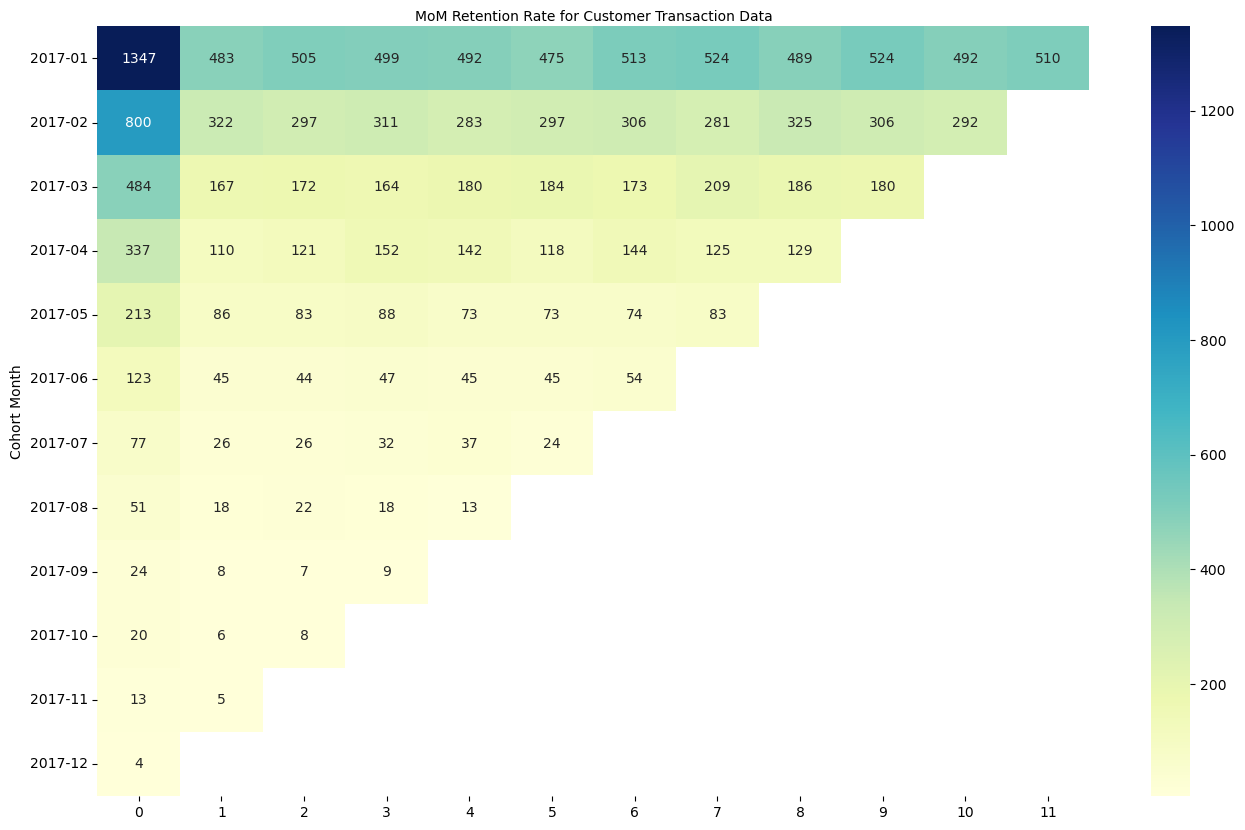

In [83]:
fig, ax = plt.subplots(1,1,figsize = (16,10))

sns.heatmap(df8, annot=True, cmap='YlGnBu', fmt='g')

ax.set_xlabel('MoM Retention Rate for Customer Transaction Data')
ax.set_ylabel('Cohort Month')
ax.xaxis.set_label_position('top')

plt.yticks(rotation=0)

plt.show()

#### Cohort Month: Month that customers signed up for the first time.
#### Cohort Index: Month that customers still active (having purchase)

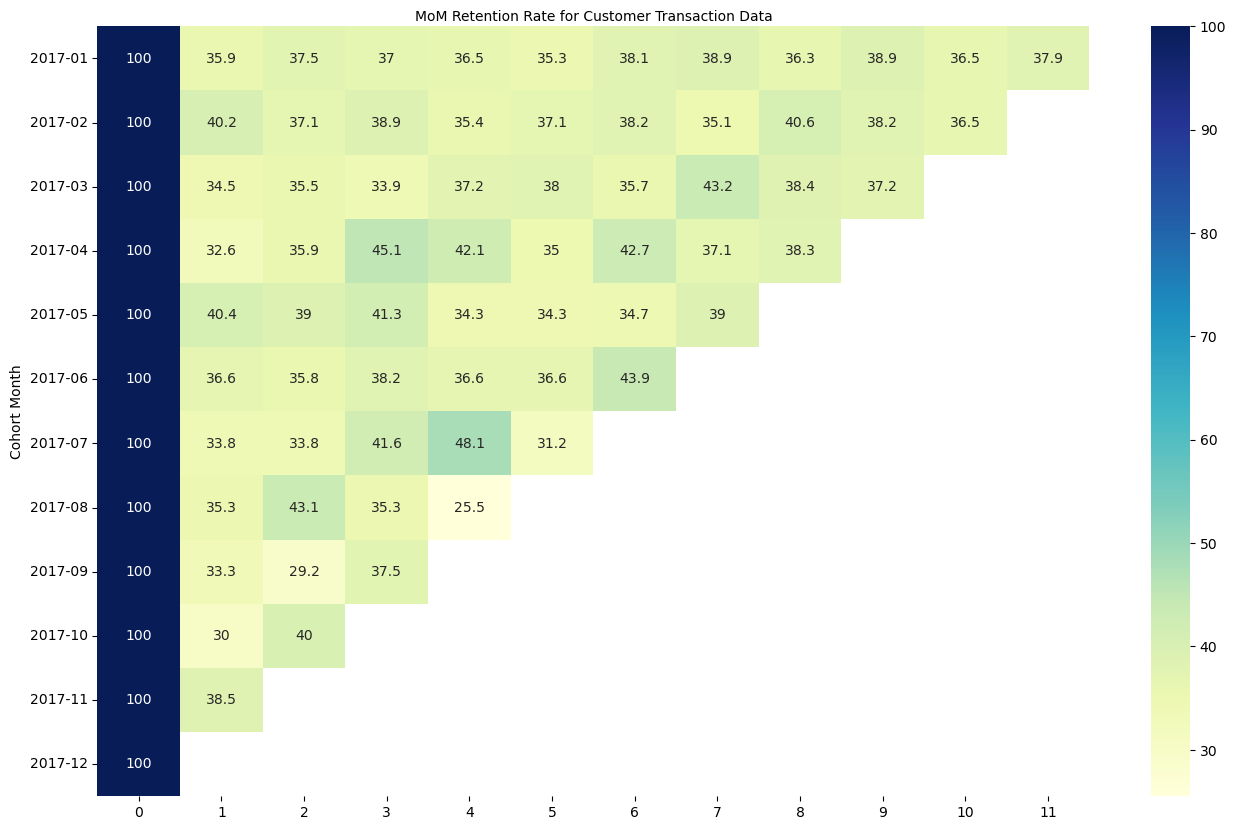

In [84]:
fig, ax = plt.subplots(1,1,figsize = (16,10))

sns.heatmap(df9, annot=True, cmap='YlGnBu', fmt='g')

ax.set_xlabel('MoM Retention Rate for Customer Transaction Data')
ax.set_ylabel('Cohort Month')
ax.xaxis.set_label_position('top')

plt.yticks(rotation=0)

plt.show()